In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification

[sklearn](https://scikit-learn.org/stable/modules/classes.html)

### Overview

- models:
    - Logistic Regression (`sklearn.linear_model.LogisticRegression`)
    - Decision Tree (`sklearn.tree.DecisionTreeClassifier`)
    - Naive Bayes (`sklearn.naive_bayes.BernoulliNB`)
    - K-Nearest Neighbors (`sklearn.neighbors.KNeighborsClassifier`)
    - Random Forest (`sklearn.ensemble.RandomForestClassifier`)
    - Support Vector Machine (`sklearn.svm.SVC`)
    - Stochastic Gradient Descent (`sklearn.linear_model.SGDClassifier`)
    - AdaBoost (`sklearn.ensemble.AdaBoostClassifier`)
    - Bagging (`sklearn.ensemble.BaggingClassifier`)
    - Gradient Boosting (`sklearn.ensemble.GradientBoostingClassifier`)
    

### Acquisition

### Prep

Encode:
- label encoding: ordinal categorical
- one-hot encoding: nominal categorical
    - `pd.get_dummies(categorical_series_or_df, drop_first=False)`
    - `df = pd.concat([df, dummy_df], axis=1)`

In [ ]:
from sklearn.model_selection import train_test_split


def split_data(df, test_size=.2, validate_size=.2, stratify_col=None, random_state=None):
    '''
    take in a DataFrame and return train, validate, and test DataFrames;.
    default size 
    return train, validate, test DataFrames.
    '''
    # no stratification
    if stratify_col == None:
        # split test data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state)
        # split validate data
        train, validate = train_test_split(train_validate, test_size=validate_size/(1-test_size), random_state=random_state)
    # stratify split
    else:
        # split test data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state,
                                                stratify = df[stratify_col])
        # split validate data
        train, validate = train_test_split(train_validate, test_size=validate_size/(1-test_size),
                                           random_state=random_state, stratify=train_validate[stratify_col])       
    return train, validate, test

# example clean
def clean_data(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

def impute_mode(train, validate, test):
    '''
    take in train, validate, and test DataFrames, impute mode for embark_town,
    and return train, validate, and test DataFrames
    '''
    imputer = SimpleImputer(missing_values = None, strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

### Tidy Data

Goal:
- data is tabular
- one value per cell
- each variable is a column
- each observation is a row

Reshaping data:
- wide -> long data format (`df.melt(id_vars=[cols_to_not_melt], var_name, value_name)`)
- long -> wide data format (`df.pivot(index, columns)`, `df.unstack()`, `df.pivot_table(values, index, columns)`)

In [ ]:
df['col'].str.split(':', expand=True)

### EDA

###### Univariate: categorical

count (bar) plots

In [ ]:
# count (bar) plots
for col in cat_cols:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True))
    sns.countplot(c=col, data=train)
    plt.show()
    print()

Summarize: Takeaways

###### Univariate: numerical

histograms

In [ ]:
for col in col_cat:
    print(col.upper())
    print(train[col].value_counts())
    sns.histplot(x=col, data=train)
    plt.show()
    print()

Summarize: Takeaways

#### Bivariate

- Hypothesize
- Visualize
- Analyze
- Summarize

###### Bivariate: categorical - categorical

Hypothesize: Which categorical variables relate to the target?

Visualize: Bar plot

In [ ]:
for col in cat_cols:
    sns.barplot(data=train, x=col, y='target')
    plt.show()

Summarize: Takeaways

Analyze (with stats):

stats test: t-test or mannwhitney (`stats.mannwhitneyu()`)

$H_0$

$H_a$

2 sample ttest between those that meet the target and those that don't

In [ ]:
t_stat, p_value = stats.ttest_1samp(train_target1[col], train_target2[col])

Summarize: Stat test conclusion

###### Bivariate: continuous- categorical target

Hypothesize: Which continuous variables relate to the target?

Visualize: boxplot, swarmplot, violinplot, stripplot

In [ ]:
for col in cont_colst:
    sns.boxplot(data=train, x='target', y=col)
    plt.show()

Summarize: Takeaways

#### Multivariate

- Hypothesize
- Visualize
- Analyze (optional right now)
- Summarize

###### Multivariate: categorical - categorical - categorical target

Hypothesize: Do `cat` with `cat` relate to the target?

Visualize: hue bar plot

In [ ]:
for col in cat_cols:
    sns.barplot(data=train, x=col1, y='target', hue=col2)
    plt.show()

Summarize: Takeaways

###### Explore Conclusions: Summarize all summaries

### Evaluation

[`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html)

Confusion Matrix

|                 | Predicted Negative | Predicted Positive |      |
|-----------------|-------------------|-------------------|-------------|
| Actual Negative |       TN          |       FP          | **Precision**: TP/(ТР+FP) |
| Actual Positive |       FN          |       TP          | NPV: TN/(TN+FN) |
|    | **Recall**/Sensitivity: TP/(TP+FN) | Specificity: TN/(FP+TN)| **Accuracy** =(TP+TN) /(TP+FP+FN+TN)|



TPR (recall): How many positive cases are declared postive $\frac{TP}{TP+FN}$

FPR (recall): How many negative cases are declared postive $\frac{FP}{FP+TN}$

TNR (recall): How many negative cases are declared negative $\frac{TN}{FP+TN}$

FNR (recall): How many positive cases are declared negative $\frac{FN}{TP+FN}$


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c = confusion_matrix(df.actual, df.prediction,
                 labels = ('no target', 'target'))
c[0,0] # TN
c[0,1] # FP
c[1,0] # FN
c[1,1] # TP

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Accuracy: percentage of correct predictions

Precision: percentage of postive predictions that are correct

Recall: percentage of positive cases that are predicted

F1 Score: harmonic mean of precision and recall

Area Under ROC curve (AUC): A way to measure overall model performance for models that predict not just a class, but a probability as well

### Modeling

##### Baseline (Dummy) Model

In [ ]:
strategies = ["stratified", "most_frequent", "prior", "uniform"]
for strategy in strategies:
    dummy_classifier = DummyClassifier(strategy=strategy)
    dummy_classifier.fit(X_train, y_train)
    y_pred = dummy_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Strategy: {strategy}, Accuracy: {accuracy}")

##### Logistic Regression

##### KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Make knn object

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

Fit the object to the training data

In [ ]:
knn.fit(X_train, y_train)

Make predictions

In [ ]:
y_pred = knn1.predict(X_test)

Estimate probability

- Estimate the probability of each target, using the training data.

In [ ]:
y_pred_proba = knn.predict_proba(X_train)

Evaluate 

In [ ]:
metrics = classification_report(y_train, y_pred, labels=labels, zero_division=0)

Visualize Confusion Matrix

In [ ]:
y_pred = clf.predict(X_validate)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

ConfusionMatrixDisplay.from_estimator(knn, X_validate, y_validate)

ConfusionMatrixDisplay.from_predictions(y_validate, y_pred)


or

In [ ]:
cm = confusion_matrix(y_train, y_pred1)
sns.heatmap(cm, annot=True)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.xlabel('Actual')

Find best k

In [ ]:
model_set = []
model_accuracies = {}
for k in range(1,10):
    # Make object
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the object
    knn.fit(X_train, y_train)
    
    model_set.append(knn)
    model_accuracies[f'{i}_neighbors'] = {'train_score': round(knn.score(X_train, y_train), 2),
                                          'validate_score':round(knn.score(X_validate, y_validate), 2) }

pd.DataFrame(model_accuracies).T

or

In [ ]:
metrics = []

for k in range(1, 21):
    # Make KNN classifier 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN classifier
    knn.fit(X_train, y_train)
    
    # Use KNN classifier
    train_score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        'k': k,
        'train_score': train_score,
        'validate_score': validate_score
    }
    
    metric.append(output)
    

pd.DataFrame(output)

##### Decision Trees

Pros:
- requires little data prep
- no need to encode

Cons:
- can create complex trees that overfit

Hyperparameters:

- `criterion`: The function to measure the quality of a split. The default value is "gini", but you can also use "entropy" to measure information gain.
- `max_depth`: The maximum depth of the decision tree. It controls the maximum number of levels in the tree. Use a lower value to avoid overfitting.
- `min_samples_split`: The minimum number of samples required to split an internal node. It prevents further splitting of nodes with a small number of samples.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. It controls the minimum size of the leaf nodes.
- `max_features`: The number of features to consider when looking for the best split. It can be an integer value or a float value between 0 and 1 to represent a percentage of features.
- `class_weight`: Weights associated with classes. You can use it to balance the class distribution if it is skewed.

##### Random Forest

##### Logistic Regression

Hyperparametes:
- `penalty`: 
    - `L2`(default)
    - `L1` Lasso, use when feature selection is important
- `C`: Inverse of regularization strength
    - Use .001, .01, 1, 10, 100, 1000
    
    - The lower the C, the higher regularization, discourages more complex model. More simplicity, less chance of overfit
- `solver`:
    - `lbfgs`
    - `liblinear`, best for smaller datasets, needs `random_state`
    
Interpreting model coefficients

### User-Defined Functions

### Storytelling

- clarify story with 3 questions
    - Who?
    - What?
    - How?
    
- For Visuals:
    - Note First things audience will see
        - Do these things match the charts main idea
    - Is anything misleading?
        - scale, y-axis, etc.
    - Is anything missing?
    - Any improvements?
    - Are colors appropriate?
    - Annotations needed or helpful?
    - Useful & meaningful titles that guide us to the key message
    - Axes, labels & variables are names that mean something to the audience.
    - Font size/type appropriate for setting and audience
    - Minimal extraneous elements, eye travel is limited
    - Chart types are appropriate for the purpose and data type
    - Charts are ethical in their construction and use
    
- Creating the Data Story
    - DRAW it out:
        - Label 10-15 points:
            - Setting: Audience, Location, Display, Time Available
            - Goal of audience
            - Deliverables
            - Big Idea: Gist / Thesis / Single Unifying Idea
            - Title/Agenda: From big idea, create title and subtitle
            - Executive Summary: If they only saw one slide, include big idea, top findings/takeaways, and recommendation.
            - Findings: Title of key takeaway, include visual
            - Recommendation, Conclusion: What should audience do with this info? Next Steps for me. How to reach me.
        - Slide Structure:
            - Title: title, names, date
            - Agenda: Summary of what's to be presented
            - Executive Summary:
                - Goal, Big Idea, Key Findings, Recommendations
            - Findings that support big idea
            - Recommendations for audience, and expected results
            - Conclusion: give breif summary and leave audience with the biggest takeaway
    - TALK it through
        1. Talk about insights with partner
        2. Note keywords to identify good chart
        3. Find simplest chart that conveys my message
        4. Draw/Brainstorm chart
        5. Repeat for each desired insight
    - DIGITIZE drawings
        - Create charts
        - Have appropriate labels and variable names
        - Numeric labels should be appropriate
        - Title indicates key takeaway
    - REFINE slides
        - Adjust what's around the chart
        - Simplify the chart
        - Add clarity to the chart
        - Ensure consistency across charts
        - Make idea stand out
    - PRACTICE presentation
        - Write script
        - Speak script
        - Adjust script to match my language
        - Repeat until it feels natural
        - Practice until I don't need script
        - Reduce filler words, Reduce content if presentation is too long.


Viz 1

In [39]:
titanic = sns.load_dataset('titanic')
# titanic.groupby(['sex','survived'])['sex'].count()
titanic['sex+survived'] = titanic['sex'] + titanic['survived'].replace({1:'_survived',
                                                                        0:'_perished'})
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex+survived
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male_perished
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female_survived
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female_survived
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female_survived
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male_perished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male_perished
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female_survived
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female_perished
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male_survived


In [49]:
data = titanic.groupby('sex+survived')['survived'].count()

([<matplotlib.patches.Wedge at 0x7fe6e5a2dfc0>,
 [Text(1.0554422683381766, 0.30990582150899426, 'female_perished'),
  Text(0.1948313451685962, 1.0826083072560433, 'female_survived'),
  Text(-0.8249425748237365, -0.727646719392855, 'male_perished'),
  Text(1.0197569014785908, -0.4124267957914275, 'male_survived')],
 [Text(0.5756957827299144, 0.16903953900490593, '9%'),
  Text(0.10627164281923428, 0.5905136221396599, '26%'),
  Text(-0.44996867717658345, -0.39689821057792085, '53%'),
  Text(0.5562310371701403, -0.22496007043168773, '12%')])

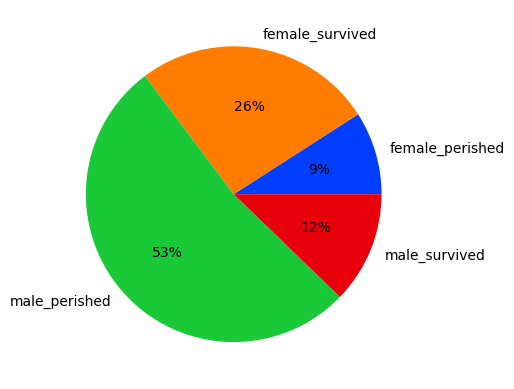

In [41]:
colors = sns.color_palette('bright')[0:5]

plt.pie(x=data, 
        labels = data.index,
        colors = colors, autopct='%.0f%%')

In [164]:
data = titanic.groupby('sex+survived')['survived'].value_counts()
data = data / data.sum()
data = data.sort_values(ascending=False)

In [165]:
labels = [' '.join(x[0].split('_')) for x in data.index[:]]

Rectangle(xy=(-0.4, 0), width=0.8, height=0.188908, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=0.742038, angle=0)


Text(0.5, 1.0, 'Titanic Survival Rate by Gender')

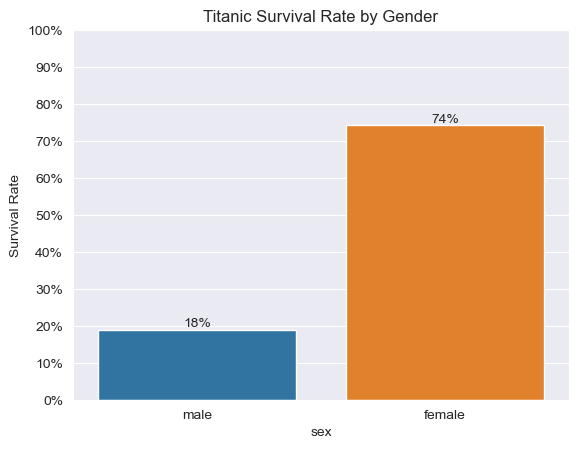

In [245]:
sns.barplot(data=titanic, x='sex', y='survived', errorbar=None)
ax = plt.gca()
for p in ax.patches:
    print(p)
    ax.annotate(f'{int(p.get_height()*100)}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.yticks(np.arange(0,1.1, .10), labels=[str(int(x*100))+'%' for x in np.arange(0,1.1, .10)])
plt.ylabel('Survival Rate')
plt.title('Titanic Survival Rate by Gender')


### Viz2

In [150]:
percents = [72, 71, 67, 66, 67]
years = list(range(1972, 1977))

df = pd.DataFrame({'Year': years, 'Percentage': percents})
df

,Year,Percentage
0,1972,72
1,1973,71
2,1974,67
3,1975,66
4,1976,67


Text(0, 0.5, 'Percent\nof Students\n25 and Under')

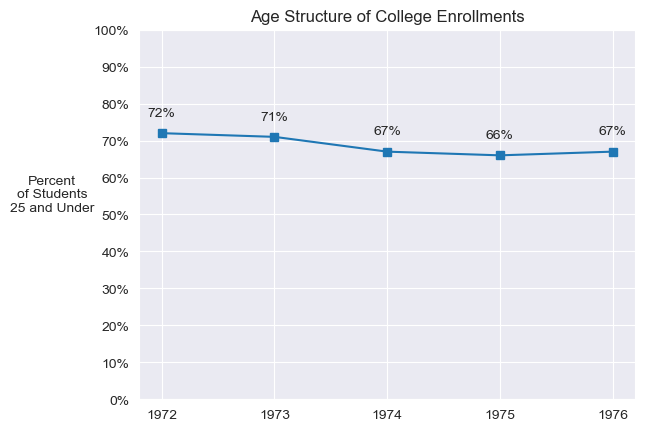

In [244]:
plt.plot(years, percents, marker='s', linestyle='-')

for i in range(len(years)):
    plt.annotate(f'{percents[i]}%', (years[i], percents[i]),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom')

plt.xticks(years)
plt.yticks(range(0,101, 10), [str(x)+'%' for x in range(0,101, 10)])
plt.title('Age Structure of College Enrollments')
plt.ylabel('Percent\nof Students\n25 and Under', rotation=0,
           labelpad=30)

### Viz3

In [130]:
labels = ['Starbucks','Taco Bell','Pizza Hut','KFC',
          'Wendy\'s', 'Burger King', 'Afghanistan\n (GDP)', 'McDonald\'s']
sales = [4.1, 4.3, 8, 8.2, 9.4, 11.3, 21, 41]

df = pd.DataFrame({'Groups': labels, 'Revenue': sales})

Text(0.5, 1.0, 'Revenue by Restaurant')

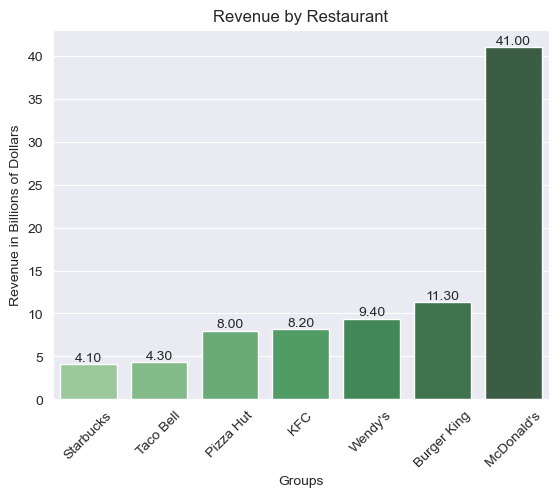

In [197]:
pal = sns.color_palette('Greens_d', 8)

sns.barplot(data=df, x='Groups', y='Revenue', palette=pal)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('Revenue in Billions of Dollars')
plt.title('Revenue by Restaurant')

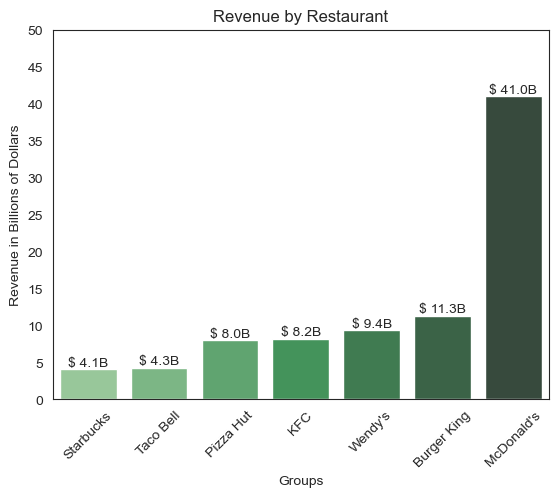

In [249]:
sns.set_style('white')
labels = ['Starbucks','Taco Bell','Pizza Hut','KFC',
          'Wendy\'s', 'Burger King', 'McDonald\'s']
sales = [4.1, 4.3, 8, 8.2, 9.4, 11.3, 41]

df = pd.DataFrame({'Groups': labels, 'Revenue': sales})

pal = sns.color_palette('Greens_d', 7)

sns.barplot(data=df, x='Groups', y='Revenue', palette=pal)
plt.xticks(rotation=45)
plt.yticks(range(0, 51, 5))
plt.ylabel('Revenue in Billions of Dollars')
plt.title('Revenue by Restaurant')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\$ {p.get_height()}B', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# # add line indicating estimate of all targets
# plt.axhline(21, label='''Aghanistan's GDP''', color=(0.9, 0.5, 0.1))
# plt.annotate('$ 21B', xy=(3, 21), ha='center', va='bottom')
# # display the legend
# plt.legend(loc='upper left', edgecolor='black')
